<a href="https://colab.research.google.com/github/imsidharthj/Fastai/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
#%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

In [ ]:
dataset = MNIST(root = 'data/', download = True)
print(len(dataset))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14821345.24it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 437163.04it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4138595.70it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2704120.48it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

60000


Label: 3


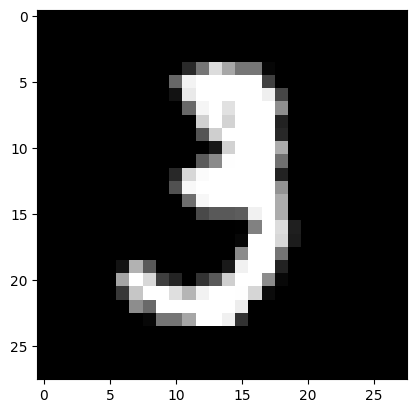

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap = 'gray')
print('Label:', label)

In [ ]:
mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(image_tensor[:,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


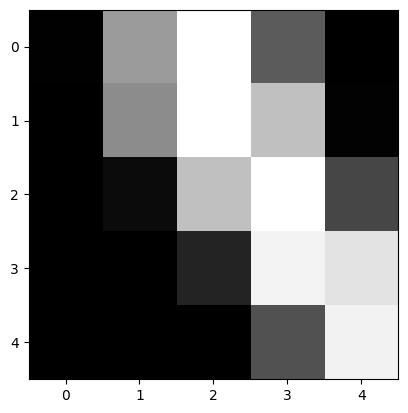

In [ ]:
plt.imshow(image_tensor[0,10:15,10:15],cmap = 'gray')

In [ ]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
## Print the length of train and validation datasets
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [ ]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [ ]:
import torch.nn as nn

input_size = 28 * 28
num_classes = 10

## Logistic regression model
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[ 8.7972e-05, -9.8414e-03, -1.9800e-03,  ..., -1.9206e-02,
          2.4256e-02, -2.6026e-02],
        [-1.7734e-02, -2.2742e-02, -2.6799e-02,  ...,  3.6996e-03,
         -1.2125e-02,  9.5440e-03],
        [-2.7523e-02,  1.6802e-02, -3.0252e-02,  ...,  6.0552e-04,
          1.4399e-02, -1.6096e-02],
        ...,
        [-1.0053e-02,  9.4503e-03,  2.1555e-02,  ...,  3.2909e-03,
          1.8246e-02,  1.8160e-02],
        [-2.9902e-02,  2.3286e-02,  2.9038e-02,  ..., -2.3926e-02,
          1.3464e-02, -3.3502e-02],
        [-8.8757e-03, -2.2815e-02, -2.9921e-02,  ..., -2.8111e-02,
          2.4189e-02, -2.4266e-02]], requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([ 0.0221,  0.0232,  0.0087, -0.0088, -0.0253, -0.0029, -0.0256,  0.0213,
         0.0093, -0.0298], requires_grad=True)


In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    images = images.reshape(images.shape[0], -1)
    outputs = model(images)
    break

tensor([5, 9, 7, 0, 2, 3, 0, 8, 3, 1, 0, 3, 2, 1, 3, 4, 0, 0, 0, 0, 3, 4, 6, 6,
        9, 6, 5, 6, 6, 9, 8, 0, 1, 3, 1, 9, 5, 8, 7, 5, 6, 4, 5, 4, 5, 4, 9, 9,
        0, 2, 6, 7, 3, 3, 2, 1, 3, 6, 6, 9, 8, 7, 2, 2, 6, 6, 2, 3, 5, 6, 3, 4,
        5, 9, 3, 2, 1, 1, 5, 0, 0, 9, 4, 3, 5, 3, 9, 3, 0, 4, 0, 3, 5, 6, 6, 7,
        0, 4, 2, 7, 6, 2, 4, 3, 2, 1, 7, 2, 1, 8, 5, 7, 8, 4, 7, 4, 1, 6, 3, 3,
        2, 6, 6, 1, 7, 6, 4, 0])
torch.Size([128, 1, 28, 28])


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        print(xb)
        out = self.linear(xb)
        print(out)
        return(out)

model = MnistModel()
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0064, -0.0034,  0.0113,  ...,  0.0332,  0.0233,  0.0019],
         [-0.0357, -0.0084,  0.0102,  ...,  0.0074, -0.0211,  0.0270],
         [-0.0108, -0.0254,  0.0096,  ..., -0.0275, -0.0137, -0.0146],
         ...,
         [ 0.0020,  0.0126,  0.0230,  ...,  0.0005,  0.0201, -0.0092],
         [-0.0324, -0.0222,  0.0221,  ..., -0.0343,  0.0163, -0.0203],
         [-0.0032, -0.0322,  0.0184,  ...,  0.0140, -0.0119,  0.0042]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0291,  0.0193, -0.0249,  0.0235,  0.0158, -0.0054,  0.0046, -0.0201,
          0.0211,  0.0170], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs shape: ', outputs.shape)
print('Sample outputs: \n', outputs[:2].data)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[-0.1540,  0.1152, -0.0266,  ..., -0.0565, -0.1319, -0.0955],
        [ 0.0814, -0.0016, -0.1116,  ...,  0.0248, -0.0090, -0.0766],
        [-0.1733, -0.0193,  0.0210,  ...,  0.0157, -0.0871,  0.1021],
        ...,
        [-0.2908,  0.1048,  0.1001,  ..., -0.2387, -0.0696,  0.1122],
        [-0.2218, -0.1122, -0.0702,  ...,  0.1267, -0.0779, -0.2888],
        [-0.2077, -0.1616, -0.0321,  ..., -0.0698,  0.1489, -0.0112]],
       grad_fn=<AddmmBackward0>)
outputs shape:  torch.Size([128, 10])
Sample outputs: 
 tensor([[-0.1540,  0.1152, -0.0266, -0.2300,  0.3050,  0.1172,  0.1653, -0.0565,
         -0.1319, -0.0955],
        [ 0.0814, -0.0016, -0.1116, -0.2520,  0.1876,  0.1549,  0.1307,  0.0248,
         -0.0090, -0.0766]])


In [ ]:
probs = F.softmax(outputs, dim = 1)

## chaecking at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

print("\n")
## Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())
max_probs, preds = torch.max(probs, dim = 1)
print("\n")
print(preds)
print("\n")
print(max_probs)

Sample probabilities:
 tensor([[0.0846, 0.1107, 0.0960, 0.0784, 0.1338, 0.1109, 0.1164, 0.0932, 0.0864,
         0.0896],
        [0.1062, 0.0978, 0.0876, 0.0761, 0.1182, 0.1143, 0.1116, 0.1004, 0.0971,
         0.0907]])


Sum:  0.9999998807907104


tensor([4, 4, 5, 5, 6, 2, 3, 6, 6, 5, 6, 6, 1, 6, 4, 5, 6, 6, 6, 4, 6, 5, 2, 6,
        8, 6, 6, 5, 6, 6, 5, 6, 5, 6, 3, 5, 6, 5, 4, 4, 5, 5, 5, 6, 1, 5, 5, 5,
        6, 1, 9, 7, 5, 6, 4, 4, 4, 6, 6, 8, 5, 5, 5, 6, 5, 6, 2, 4, 4, 3, 5, 2,
        3, 6, 1, 2, 6, 7, 6, 6, 6, 2, 1, 6, 5, 6, 6, 6, 5, 5, 8, 4, 2, 5, 4, 5,
        6, 5, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 6, 6, 1, 6, 5, 6, 5, 6, 6, 5, 6, 2,
        5, 6, 2, 6, 6, 5, 5, 5])


tensor([0.1338, 0.1182, 0.1271, 0.1192, 0.1439, 0.1214, 0.1439, 0.1620, 0.1313,
        0.1180, 0.1509, 0.1345, 0.1352, 0.1407, 0.1292, 0.1323, 0.1278, 0.1275,
        0.1377, 0.1201, 0.1491, 0.1369, 0.1224, 0.1387, 0.1383, 0.1244, 0.1470,
        0.1290, 0.1321, 0.1265, 0.1385, 0.1285, 0.1293, 0.1506, 0.1302, 0.

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return(torch.tensor(torch.sum(preds == labels).item()/ len(preds)))

print("Accuracy: ",accuracy(outputs, labels))
print("\n")
loss_fn = F.cross_entropy
print("Loss Function: ",loss_fn)
print("\n")
## Loss for the current batch
loss = loss_fn(outputs, labels)
print(loss)

Accuracy:  tensor(0.0781)


Loss Function:  <function cross_entropy at 0x7cf9d4644160>


tensor(2.3502, grad_fn=<NllLossBackward0>)


In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return(out)

    def training_step(self, batch):
        images, labels = batch
        out = self(images) ## Generate predictions
        loss = F.cross_entropy(out, labels) ## Calculate the loss
        return(loss)

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return({'val_loss':loss, 'val_acc': acc})

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return({'val_loss': epoch_loss.item(), 'val_acc' : epoch_acc.item()})

    def epoch_end(self, epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))


model = MnistModel()

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return(model.validation_epoch_end(outputs))

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):

        ## Training Phas
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        ## Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return(history)

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3237810134887695, 'val_acc': 0.12490110844373703}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9642, val_acc: 0.5801
Epoch [1], val_loss: 1.6960, val_acc: 0.7151
Epoch [2], val_loss: 1.4942, val_acc: 0.7511
Epoch [3], val_loss: 1.3412, val_acc: 0.7724
Epoch [4], val_loss: 1.2234, val_acc: 0.7857


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1309, val_acc: 0.7951
Epoch [1], val_loss: 1.0565, val_acc: 0.8024
Epoch [2], val_loss: 0.9958, val_acc: 0.8091
Epoch [3], val_loss: 0.9453, val_acc: 0.8153
Epoch [4], val_loss: 0.9026, val_acc: 0.8206


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8660, val_acc: 0.8245
Epoch [1], val_loss: 0.8344, val_acc: 0.8286
Epoch [2], val_loss: 0.8067, val_acc: 0.8315
Epoch [3], val_loss: 0.7823, val_acc: 0.8352
Epoch [4], val_loss: 0.7605, val_acc: 0.8371


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7410, val_acc: 0.8406
Epoch [1], val_loss: 0.7234, val_acc: 0.8432
Epoch [2], val_loss: 0.7075, val_acc: 0.8449
Epoch [3], val_loss: 0.6929, val_acc: 0.8460
Epoch [4], val_loss: 0.6796, val_acc: 0.8478


Text(0.5, 1.0, 'Accuracy Vs. No. of epochs')

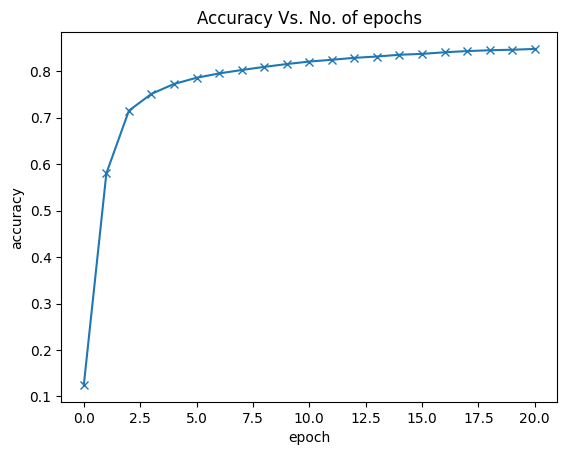

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Vs. No. of epochs')

In [ ]:
test_dataset = MNIST(root = 'data/', train = False, transform = transforms.ToTensor())

shape:  torch.Size([1, 28, 28])
Label:  7


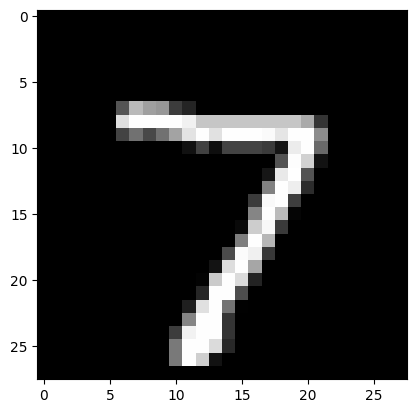

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print("shape: ", img.shape)
print('Label: ', label)

In [ ]:
print(img.unsqueeze(0).shape)
print(img.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 28, 28])


In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return(preds[0].item())

Label: 7 , Predicted : 7


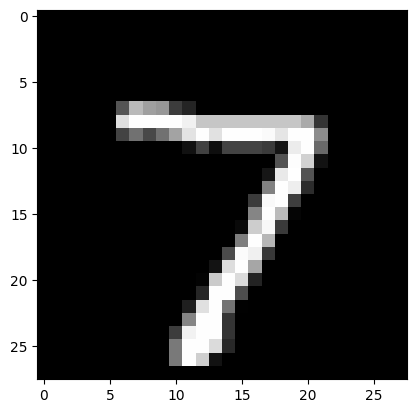

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap = 'gray')
print('Label:', label, ', Predicted :', predict_image(img, model))

Label: 9 ,Predicted: 9


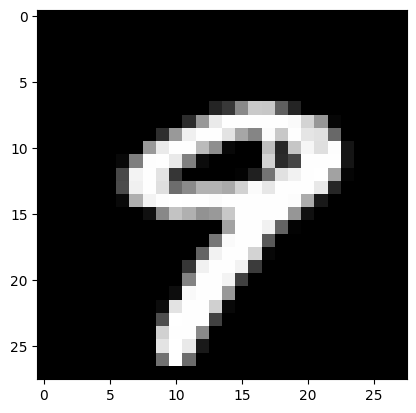

In [ ]:
img, label = test_dataset[9]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 0 ,Predicted: 0


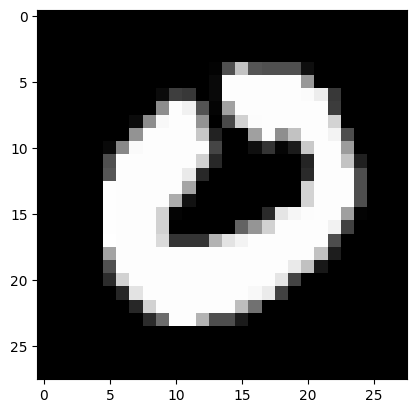

In [ ]:
img, label = test_dataset[25]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

Label: 3 ,Predicted: 3


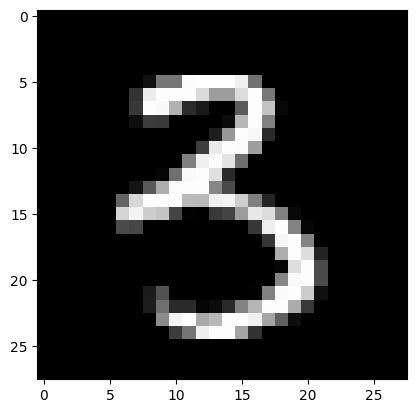

In [ ]:
img, label = test_dataset[5000]
plt.imshow(img[0], cmap = 'gray')
print("Label:", label, ',Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6431329250335693, 'val_acc': 0.861621081829071}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0032,  0.0132,  0.0269,  ..., -0.0096,  0.0222,  0.0209],
                      [-0.0217,  0.0330, -0.0112,  ...,  0.0187, -0.0233,  0.0192],
                      [ 0.0126, -0.0230,  0.0335,  ...,  0.0191, -0.0357, -0.0217],
                      ...,
                      [-0.0214,  0.0136,  0.0031,  ...,  0.0182,  0.0325, -0.0273],
                      [ 0.0049,  0.0335, -0.0246,  ...,  0.0252, -0.0266, -0.0202],
                      [ 0.0242, -0.0278,  0.0111,  ..., -0.0227, -0.0227, -0.0123]])),
             ('linear.bias',
              tensor([-0.0712,  0.0856,  0.0090, -0.0291,  0.0601,  0.0261,  0.0125,  0.0565,
                      -0.0927, -0.0351]))])

In [ ]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

<ipython-input-37-5b4a6824e55a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('mnist-logistic.pth'))


OrderedDict([('linear.weight',
              tensor([[-0.0032,  0.0132,  0.0269,  ..., -0.0096,  0.0222,  0.0209],
                      [-0.0217,  0.0330, -0.0112,  ...,  0.0187, -0.0233,  0.0192],
                      [ 0.0126, -0.0230,  0.0335,  ...,  0.0191, -0.0357, -0.0217],
                      ...,
                      [-0.0214,  0.0136,  0.0031,  ...,  0.0182,  0.0325, -0.0273],
                      [ 0.0049,  0.0335, -0.0246,  ...,  0.0252, -0.0266, -0.0202],
                      [ 0.0242, -0.0278,  0.0111,  ..., -0.0227, -0.0227, -0.0123]])),
             ('linear.bias',
              tensor([-0.0712,  0.0856,  0.0090, -0.0291,  0.0601,  0.0261,  0.0125,  0.0565,
                      -0.0927, -0.0351]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size = 256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6431329250335693, 'val_acc': 0.861621081829071}